In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import mplhep as hep
from coffea.util import load
from coffea.hist import plot
import coffea.hist as hist
import re

In [77]:
output = load('hists_ttcom_temp.coffea')

ValueError: Reducing along axis <Bin (name=jet_pt) instance at 0x7f6bf3585bd0>: requested start 0.44 exceeds bin boundaries (use open slicing, e.g. x[:stop])

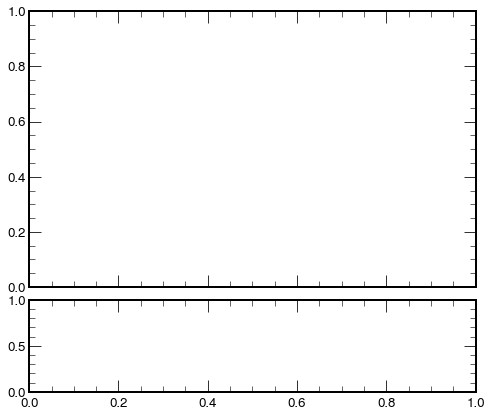

In [91]:
plt.style.use([hep.style.ROOT, {'font.size': 16}])

# plot options for data
data_err_opts = {
    'linestyle': 'none',
    'marker': '.',
    'markersize': 10.,
    'color': 'k',
    'elinewidth': 1,
}

# print(output.keys())
# for i in range(0, len(output.keys())-1):
fig, ((ax1),(rax1)) = plt.subplots(2, 1, figsize=(8, 7), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
fig.subplots_adjust(hspace=.07)
hl=output['jet_pt']
# hb=output['jet_pt'][5]
ixes = hl.axis('flav').identifiers()
# print(ixes[0])
# hl[0,4]
num=hl["Data"].integrate('jet_pt',slice(0.44,None))
# print(num)
num=num.rebin("flav",hist.Bin("flav", "flav", [0,4,5,6]))
plot.plot1d(num,ax=ax1,legend_opts={'loc':1} ,overlay="flav", stack=True)
# plot.plot1d(
#     hl["Data"],
#     overlay="flav",
#     stack=True,
#     fill_opts={'alpha': .5, 'edgecolor': (0,0,0,0.3)}
# )
# print(hl['FatJet.hadronFlavour==5'])
# print(hl.axis('hadronFlavour'))
# ixes = hl.axis('hadronFlavour').identifiers()
# print(ixes)
# print(output['dataset'])
# print(ixes)

# hl=output['lfatjet_pt']
# hc=output['cfatjet_pt']
# hb=output['bfatjet_pt']
# hdata=hl["Data"]
# hmc=hl["ttbar"]
# hdata.add(hb["Data"])
# hdata.add(hc["Data"])
# hmc.add(hc["ttbar"])
# hmc.add(hb["ttbar"])
# print(hc["genflavour"])
# plot.plot1d(sum(hl["ttbar"],hc["ttbar"],hb["ttbar"]), ax=ax1, legend_opts={'loc':1}, density=False,stack=True, clear=False);
# plot.plot1d(hdata, ax=ax1, legend_opts={'loc':1}, density=False, error_opts=data_err_opts, clear=False);

# plot.plot1d(hl['genflavour'], ax=ax1, legend_opts={'loc':1}, density=False, error_opts={'color':'b'});

# for i in range(0, len(output.keys())-1):
#     fig, ((ax1),(rax1)) = plt.subplots(2, 1, figsize=(8, 7), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
#     fig.subplots_adjust(hspace=.07)
#     h1name = list(output.keys())[i]
#     if any([h1name.startswith('cutflow')]): 
#         break
#     print(h1name)
#     h1 = output[h1name]
#     dense = False 
#     np.seterr(divide='ignore')
#     for ax, rax, h in zip([ax1], [rax1], [h1]):
#         scales = {
#             'ttbar': 1.0,
#             'ttbarprime':1.0
#         }
#         h.scale(scales,axis='dataset')   
#         notdata = re.compile('(?!Data)')
#         if hasattr(h, 'dim'):
#             plot.plot1d(h[notdata], ax=ax, legend_opts={'loc':1}, density=dense, stack=True, clear=False);
#             plot.plot1d(h["Data"], ax=ax, legend_opts={'loc':1}, density=dense, error_opts=data_err_opts, clear=False);
#             # now we build the ratio plot
#             plot.plotratio(
#                    num=h["Data"].sum("dataset"),
#                     denom=h[notdata].sum("dataset"),
#                     ax=rax,
#                     error_opts=data_err_opts,
#                     denom_fill_opts={},
#                     guide_opts={},
#                     unc='num'
#                 )
#         else:
#             continue   

#     for ax, rax, hname in zip([ax1], [rax1], [h1name]):
#         at = AnchoredText(r"$1\mu, 1e$"+"\n"+
#                            "2+ jets"+"\n"+
#                           r"$|\eta| < 2.5$",
#                            loc=2, frameon=False)
#         ax.add_artist(at)
#         ax.set_ylim(0.001, None)
#         if ("btag" in hname) or hname.startswith("DeepCSV_trackDecayLenVal"):
#             ax.semilogy()
#         rax.set_ylabel('Data/Pred.')
#         rax.set_xlabel(hname)
#         rax.set_ylim(0,2)
#         ax.set_xlabel(None)
# #     print(ax1)    
#     hep.mpl_magic(ax1)
